#**BOOSTING TECHNIQUES**

##**THEORETICAL:**


### 1. **What is Boosting in Machine Learning?**

**Answer:**
Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) sequentially to create a strong learner. Each new model focuses on correcting the errors made by the previous ones, thus improving the overall performance.

---

### 2. **How does Boosting differ from Bagging?**

**Answer:**

* **Boosting** builds models sequentially, each new model focusing on the residual errors of the previous one.
* **Bagging** (Bootstrap Aggregating) builds models in parallel on different random subsets of data, and aggregates their results.
* Boosting reduces **bias**, while Bagging reduces **variance**.

---

### 3. **What is the key idea behind AdaBoost?**

**Answer:**
AdaBoost (Adaptive Boosting) assigns weights to training instances. It increases the weights of misclassified samples so that the next weak learner focuses more on those. The final prediction is a weighted sum of all weak learners.

---

### 4. **Explain the working of AdaBoost with an example.**

**Answer:**
Suppose we have a binary classification problem:

1. Start with equal weights for all samples.
2. Train a weak learner (e.g., a decision stump).
3. Increase weights for misclassified samples.
4. Train the next learner on the updated weights.
5. Repeat for a fixed number of iterations or until error is minimized.
6. Final output is the weighted vote of all learners.

---

### 5. **What is Gradient Boosting, and how is it different from AdaBoost?**

**Answer:**
Gradient Boosting builds models sequentially by fitting the new model to the **residuals** (errors) of the previous model using **gradient descent**.
Unlike AdaBoost, which adjusts sample weights, Gradient Boosting optimizes a differentiable loss function directly using gradients.

---

### 6. **What is the loss function in Gradient Boosting?**

**Answer:**
The loss function in Gradient Boosting can vary depending on the task:

* **Classification**: Log-loss (cross-entropy)
* **Regression**: Mean Squared Error (MSE) or Mean Absolute Error (MAE)

Gradient Boosting minimizes this loss using gradient descent.

---

### 7. **How does XGBoost improve over traditional Gradient Boosting?**

**Answer:**
XGBoost introduces several enhancements:

* Regularization to prevent overfitting
* Tree pruning using max depth
* Parallel computation
* Handling of missing values
* Efficient use of memory and CPU resources

---

### 8. **What is the difference between XGBoost and CatBoost?**

**Answer:**

| Feature          | XGBoost                              | CatBoost                                       |
| ---------------- | ------------------------------------ | ---------------------------------------------- |
| Categorical data | Requires encoding (e.g., one-hot)    | Handles categorical features natively          |
| Speed            | Very fast                            | Fast and optimized for GPUs                    |
| Training         | May need tuning for categorical vars | Less preprocessing needed                      |
| Use case         | Generic structured data              | Structured data with many categorical features |

---

### 9. **What are some real-world applications of Boosting techniques?**

**Answer:**

* Fraud detection in finance
* Customer churn prediction
* Click-through rate prediction in advertising
* Credit scoring
* Ranking in search engines (e.g., LambdaMART)
* Disease diagnosis in healthcare

---

### 10. **How does regularization help in XGBoost?**

**Answer:**
Regularization in XGBoost (through `lambda` and `alpha` parameters) penalizes overly complex models, thus:

* Reducing overfitting
* Enhancing generalization
* Stabilizing learning in noisy data

---

### 11. **What are some hyperparameters to tune in Gradient Boosting models?**

**Answer:**

* `n_estimators`: Number of boosting rounds
* `learning_rate`: Shrinkage factor for new trees
* `max_depth`: Maximum depth of trees
* `subsample`: Fraction of samples used per tree
* `min_samples_split`: Minimum samples required to split
* `loss`: Type of loss function (e.g., deviance, exponential)
* `colsample_bytree`: Features used per tree

---

### 12. **What is the concept of Feature Importance in Boosting?**

**Answer:**
Feature importance measures how useful a feature is in constructing boosted trees. It can be computed based on:

* Frequency of feature splits
* Information gain from splits
* Total reduction in loss

XGBoost, LightGBM, and CatBoost all provide tools for visualizing feature importance.

---

### 13. **Why is CatBoost efficient for categorical data?**

**Answer:**
CatBoost handles categorical variables natively using **ordered boosting** and **target-based encoding**. This reduces preprocessing and prevents **target leakage**, making it very effective on datasets with many categorical features.



##**PRACTICAL:**

###**14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.**

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Classifier Accuracy: 0.865


###**15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).**

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, y_pred))


AdaBoost Regressor MAE: 48.01001101048133


###**16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=data.feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 worst radius               0.443226
worst perimeter            0.150528
mean concave points        0.131765
worst concave points       0.126940
worst texture              0.035036
worst area                 0.029426
mean texture               0.027852
worst concavity            0.013858
area error                 0.008327
worst smoothness           0.007256
concave points error       0.004433
texture error              0.004086
radius error               0.003067
concavity error            0.002133
symmetry error             0.001846
perimeter error            0.001739
mean compactness           0.001431
fractal dimension error    0.001280
mean symmetry              0.000936
worst compactness          0.000777
compactness error          0.000694
mean area                  0.000647
mean concavity             0.000567
smoothness error           0.000526
worst fractal dimension    0.000494
mean perimeter             0.000323
mean fractal dimension     0.000262
mean ra


###**17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.**

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Gradient Boosting Regressor R² Score:", r2_score(y_test, y_pred))


Gradient Boosting Regressor R² Score: 0.9251163064345184


###**18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.**

In [30]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))

print(f"XGBoost Accuracy: {xgb_acc}")
print(f"Gradient Boosting Accuracy: {gb_acc}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.895
Gradient Boosting Accuracy: 0.91


###**19. Train a CatBoost Classifier and evaluate using F1-Score.**

In [31]:
%pip install catboost

In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("CatBoost Classifier F1-Score:", f1_score(y_test, y_pred))


CatBoost Classifier F1-Score: 0.9019607843137255


###**20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).**

In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Regressor MSE:", mean_squared_error(y_test, y_pred))


XGBoost Regressor MSE: 2121.201490123916


###**21. Train an AdaBoost Classifier and visualize feature importance.**

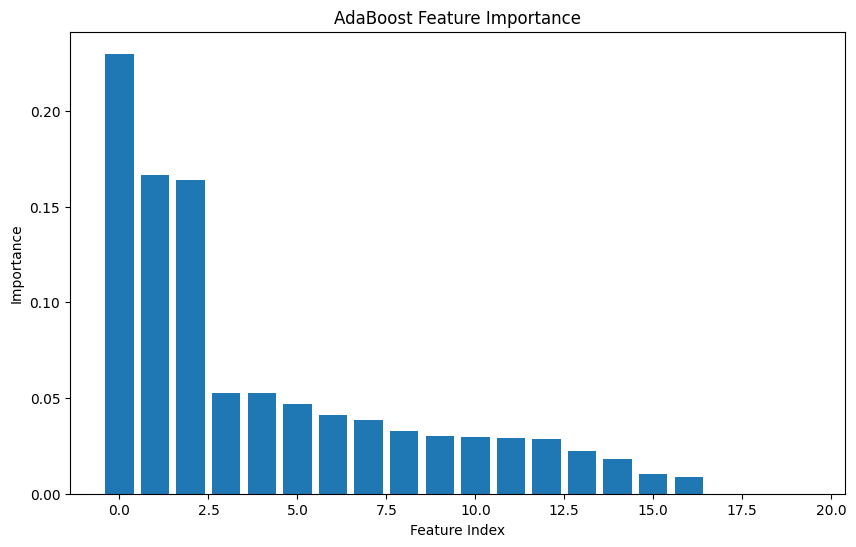

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification # Import make_classification
from sklearn.model_selection import train_test_split # Import train_test_split

# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("AdaBoost Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

###**22. Train a Gradient Boosting Regressor and plot learning curves.**

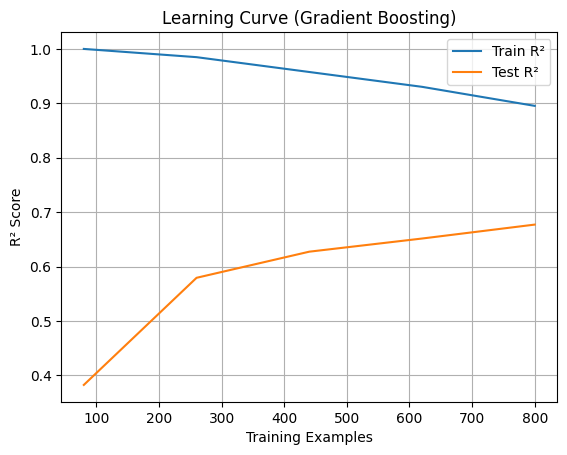

In [35]:
import numpy as np
from sklearn.model_selection import learning_curve

model = GradientBoostingRegressor(n_estimators=100, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train R²')
plt.plot(train_sizes, test_scores_mean, label='Test R²')
plt.title("Learning Curve (Gradient Boosting)")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


###**23. Train an XGBoost Classifier and visualize feature importance.**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


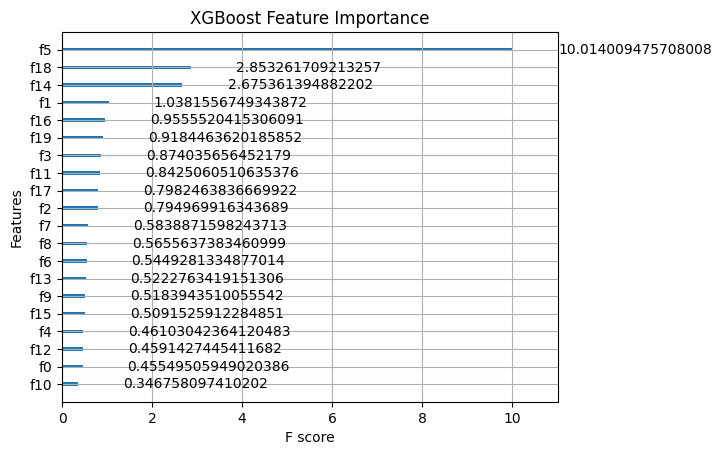

In [36]:
import xgboost as xgb

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, importance_type='gain', title="XGBoost Feature Importance")
plt.show()


###**24. Train a CatBoost Classifier and plot the confusion matrix**

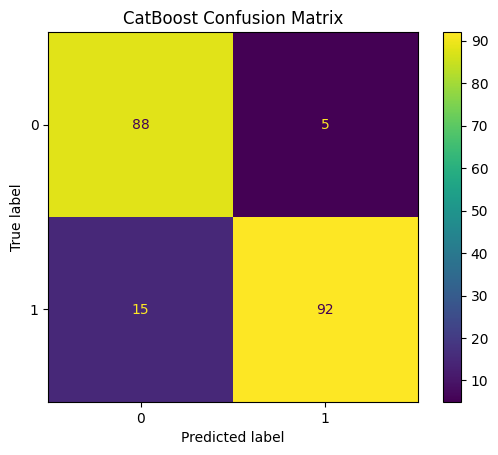

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cb_model = CatBoostClassifier(verbose=0, random_state=42)
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("CatBoost Confusion Matrix")
plt.show()


###**25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.**

In [38]:
for n in [10, 50, 100, 200]:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"AdaBoost with {n} estimators - Accuracy: {acc:.4f}")


AdaBoost with 10 estimators - Accuracy: 0.8600
AdaBoost with 50 estimators - Accuracy: 0.8750
AdaBoost with 100 estimators - Accuracy: 0.8650
AdaBoost with 200 estimators - Accuracy: 0.8650


###**26. Train a Gradient Boosting Classifier and visualize the ROC curve.**

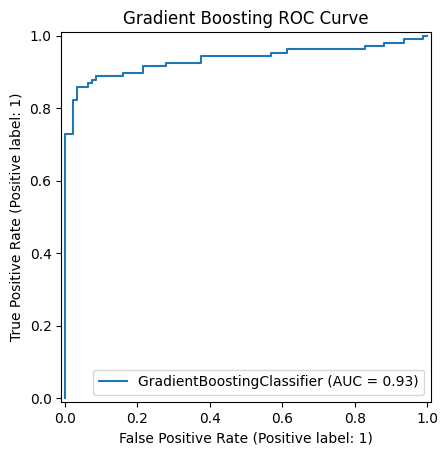

In [39]:
from sklearn.metrics import RocCurveDisplay

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
RocCurveDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Gradient Boosting ROC Curve")
plt.show()


###**27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.**

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best CV Score (neg MSE):", grid.best_score_)


Best Learning Rate: 0.1
Best CV Score (neg MSE): -0.07628555074334145


###**28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.**

In [41]:
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

cb1 = CatBoostClassifier(verbose=0, random_state=42)
cb1.fit(X_train_i, y_train_i)
f1_1 = f1_score(y_test_i, cb1.predict(X_test_i))

cb2 = CatBoostClassifier(verbose=0, random_state=42, class_weights=[1, 9])
cb2.fit(X_train_i, y_train_i)
f1_2 = f1_score(y_test_i, cb2.predict(X_test_i))

print("F1-Score without class weights:", f1_1)
print("F1-Score with class weights:", f1_2)


F1-Score without class weights: 0.7096774193548387
F1-Score with class weights: 0.6486486486486487


###**29. Train an AdaBoost Classifier and analyze the effect of different learning rates.**

In [42]:
for lr in [0.01, 0.1, 0.5, 1.0]:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning Rate = {lr} -> Accuracy: {acc:.4f}")


Learning Rate = 0.01 -> Accuracy: 0.8600
Learning Rate = 0.1 -> Accuracy: 0.8600
Learning Rate = 0.5 -> Accuracy: 0.8700
Learning Rate = 1.0 -> Accuracy: 0.8650


###**30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.**

In [43]:
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_probs = xgb_model.predict_proba(X_test)
print("XGBoost Log Loss (multiclass):", log_loss(y_test, y_probs))


XGBoost Log Loss (multiclass): 0.009289027880442384
